In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'saikoushikkalakota'
os.environ['KAGGLE_KEY'] = '916dc3b0923ae538106de8d6fdd6e1fe'

In [3]:
main_dir = './content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_No_mask_dir = os.path.join(train_dir,'Non Mask')

In [4]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[0:100])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg', '0043.jpg', '0048.jpg', '0055.jpg', '0063.jpg', '0066.jpg', '0091.jpg', '0097.png', '0110.jpg', '0112.png', '0113.jpg', '0115.jpg', '0116.png', '0121.png', '0125.jpeg', '0126.jpg', '0127.jpg', '0128.png', '0129.png', '0150.jpg', '0153.jpg', '0158.jpg', '0160.jpg', '0161.jpg', '0166.jpg', '0168.png', '0170.jpg', '0171.jpg', '0188.jpg', '0190.jpg', '0197.png', '0198.jpg', '0200.jpg', '0201.jpg', '0202.jpg', '0205.jpg', '0211.jpg', '0212.jpg', '0216.jpg', '0220.jpg', '0241.jpg', '0243.jpg', '0247.jpg', '0249.jpg', '0250.png', '0257.jpg', '0267.jpg', '0269.jpg', '0273.jpg', '0277.jpg', '0286.jpg', '0309.jpg', '0311.jpeg', '0317.jpg', '0323.jpg', '0343.jpg', '0367.png', '0372.jpg', '0376.png', '0384.jpg', '0385.jpg', '0387.png', '0414.jpg', '0415.jpg', '0417.jpg', '0418.jpg', '0420.jpeg', '0421.jpg', '0427.jpg', '0451.jpg', '0466.jpg', '0469.jpg', '0470.jpg', '0481.jpg', 

In [5]:
train_No_mask_names = os.listdir(train_No_mask_dir)
print(train_No_mask_names[0:100])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '14.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '145.jpg', '146.jpg', '148.jpg', '149.jpg', '15.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '166.jpg', '168.jpg', '169.jpg', '17.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', '174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '18.jpg', '180.jpg', '181.jpg', '183.jpg', '184.jpg', '185.jpg', '186.jpg', '187.jpg', '188.jpg', '19.jpg', '191.jpg', '

In [6]:
mask_images = []

for i in train_mask_names:
  mask_images.append(os.path.join(train_mask_dir,i))

non_mask_images=[]

for i in train_No_mask_names:
  non_mask_images.append(os.path.join(train_No_mask_dir,i))

In [7]:
import pandas
import plotly.express as px
from skimage import io
from skimage.transform import resize

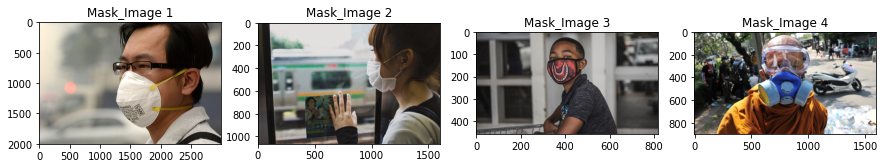

In [8]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(mask_images[0])
img2 = io.imread(mask_images[1])
img3 = io.imread(mask_images[2])
img4 = io.imread(mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Mask_Image 4")


plt.show()


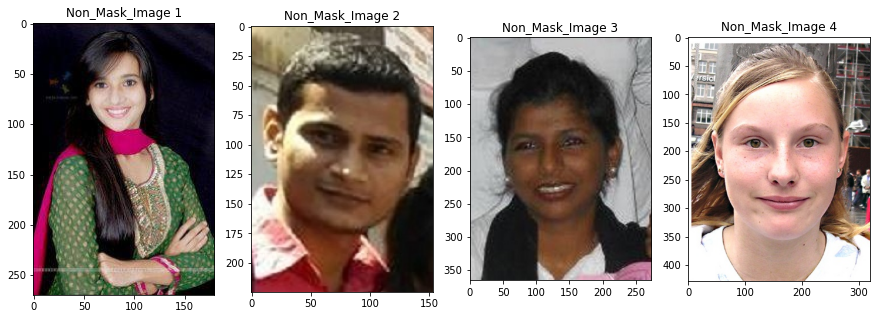

In [9]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(non_mask_images[0])
img2 = io.imread(non_mask_images[1])
img3 = io.imread(non_mask_images[2])
img4 = io.imread(non_mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Non_Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Non_Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Non_Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Non_Mask_Image 4")


plt.show()


In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=25,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(300,300),
                                                  batch_size=32,
                                                  class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [12]:
train_generator.image_shape

(300, 300, 3)

In [13]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(300,300,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 150, 150, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 75, 75, 64)        0

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
import scipy
early_stop = EarlyStopping(monitor='val_loss',patience=4)


In [16]:

model_train = model.fit(train_generator,epochs=1100,
          validation_data=valid_generator,
          batch_size=32)

Epoch 1/1100
19/19 [==============================] - 49s 2s/step - loss: 0.8451 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.5621
Epoch 2/1100
19/19 [==============================] - 35s 2s/step - loss: 0.6613 - accuracy: 0.6133 - val_loss: 0.6875 - val_accuracy: 0.5490
Epoch 3/1100
19/19 [==============================] - 35s 2s/step - loss: 0.6421 - accuracy: 0.6217 - val_loss: 0.6834 - val_accuracy: 0.5556
Epoch 4/1100
19/19 [==============================] - 35s 2s/step - loss: 0.6403 - accuracy: 0.6167 - val_loss: 0.6751 - val_accuracy: 0.6634
Epoch 5/1100
19/19 [==============================] - 35s 2s/step - loss: 0.5566 - accuracy: 0.7267 - val_loss: 0.6370 - val_accuracy: 0.7778
Epoch 6/1100
19/19 [==============================] - 35s 2s/step - loss: 0.4914 - accuracy: 0.7567 - val_loss: 0.5889 - val_accuracy: 0.8072
Epoch 7/1100
19/19 [==============================] - 35s 2s/step - loss: 0.4174 - accuracy: 0.8283 - val_loss: 0.5561 - val_accuracy: 0.8203
Epoch 

In [17]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [18]:
metrics.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.845061,0.500000,0.688125,0.562092
1,0.661319,0.613333,0.687497,0.549020
2,0.642110,0.621667,0.683422,0.555556
3,0.640302,0.616667,0.675086,0.663399
4,0.556644,0.726667,0.637034,0.777778
5,0.491396,0.756667,0.588905,0.807190
6,0.417399,0.828333,0.556138,0.820261
7,0.389955,0.833333,0.528763,0.836601
8,0.358691,0.850000,0.505449,0.846405
9,0.352291,0.856667,0.498626,0.820261


In [19]:
test_loss,test_accuracy = model.evaluate_generator(test_generator)

In [20]:
print('test_loss: ',test_loss)
print('test_accuracy: ',test_accuracy)

test_loss:  0.30174028873443604
test_accuracy:  0.9200000166893005


In [ ]:
model.save('./new_improved_model.h5')